In [440]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

In [441]:
# Load the dataset
data_path = 'kp_updated (1).csv'
df = pd.read_csv(data_path)

In [442]:
# Preprocessing
def preprocess_data(df):
    # Handle missing values
    df = df.fillna("Not Provided")

    # Standardize columns
    df['Camp Date'] = pd.to_datetime(df['Camp Date'], errors='coerce')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Extract useful features
    df['Age Group'] = df['Age'].apply(lambda x: str(x).split(' ')[0] if pd.notnull(x) else 'Unknown')
    df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

    # Encoding binary categories
    binary_cols = ['History of Diabetes', 'History of Hypertension', 
                   'The patient was provided with Diabetes Awareness in the camp today.', 
                   'Diet Chart given to the patient', 'Patient Diagnosed with Hypertension', 
                   'Patient Referred to Sugar Hospital']
    for col in binary_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Not Provided': -1})

    # Target variable encoding
    # df['Target'] = df['Patient Diagnosed with Hypertension'].fillna(0)
    return df

df = preprocess_data(df)

In [443]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['History of Diabetes', 'History of Hypertension', 'The patient was provided with Diabetes Awareness in the camp today.', 'BMI', 'Diet Chart given to the patient', 'Patient Diagnosed with Hypertension', 'Patient Referred to Sugar Hospital']
Categorical Columns: ['Score', 'Area', 'Name', 'Gender', 'National Id Card Number', 'Address', 'Contact Number ', 'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height', 'Weight', 'Cholesterol', 'HBA1c', 'Patient diagnosis', 'Eye Screening Notes', 'Foot Screening Notes', 'Dental Screening', 'Doctors Name', "Doctor's Notes", 'Medicines/Insulin Prescribed', 'Prescribed  Medicine Names ', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Obesity', 'Age Group']


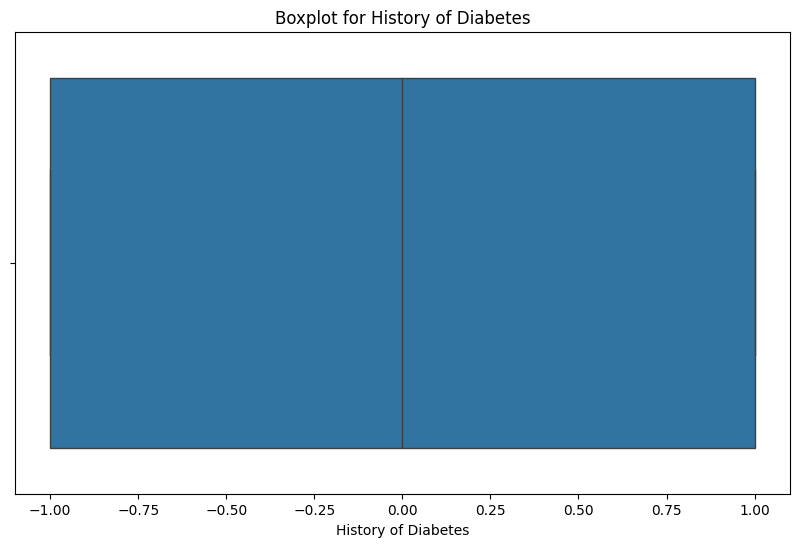

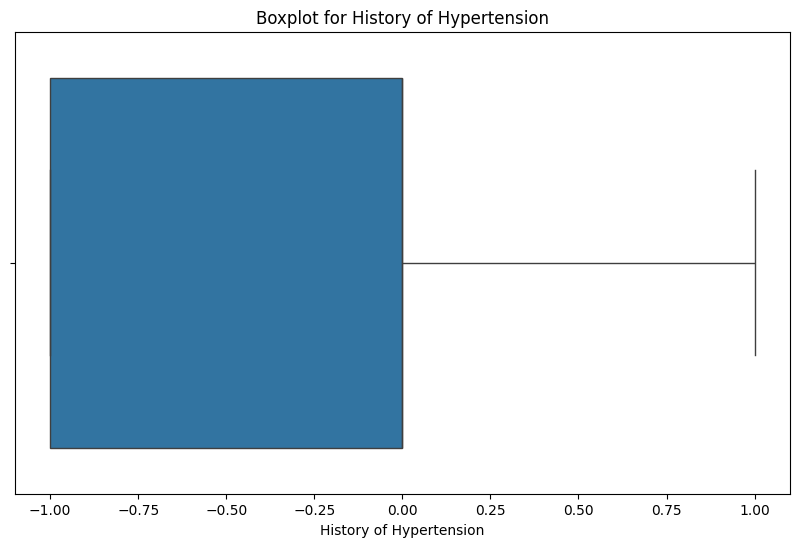

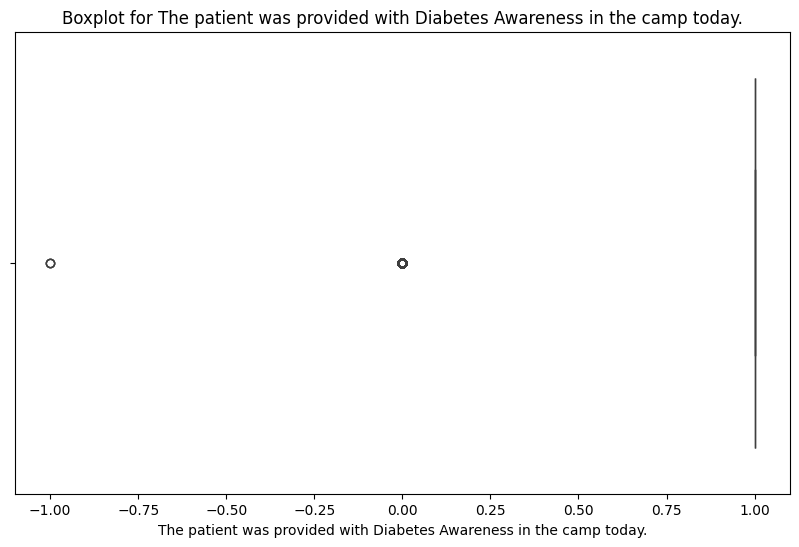

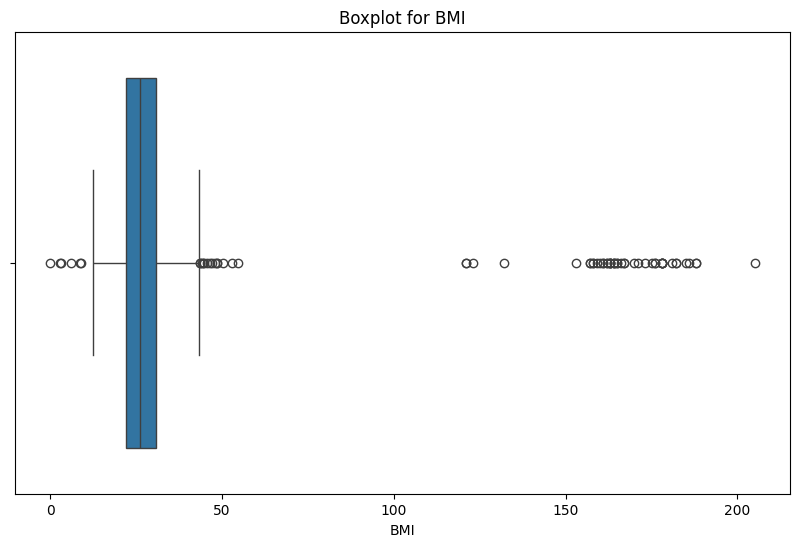

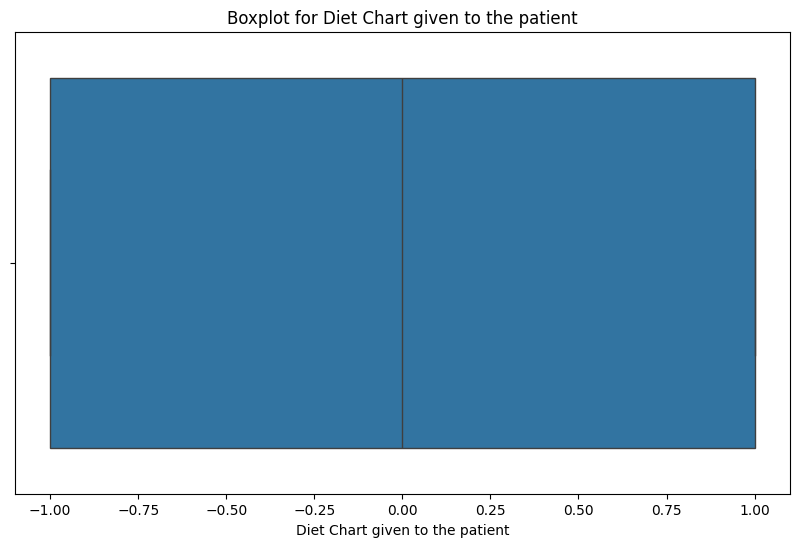

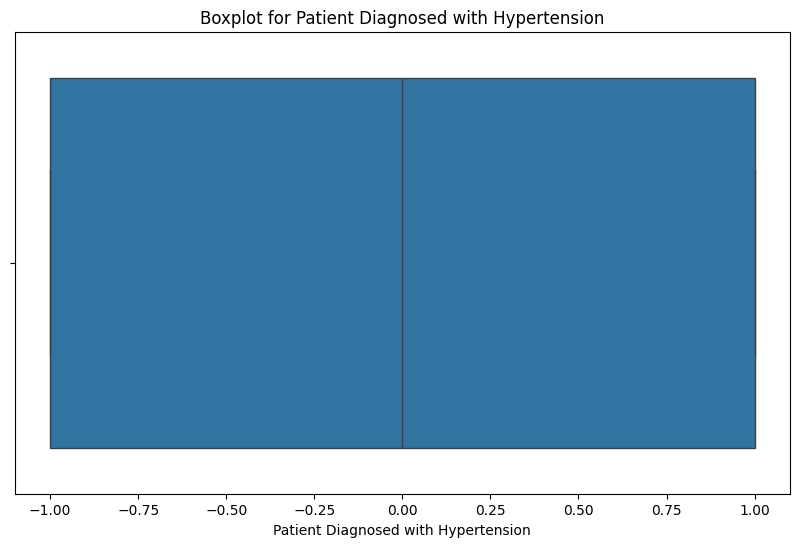

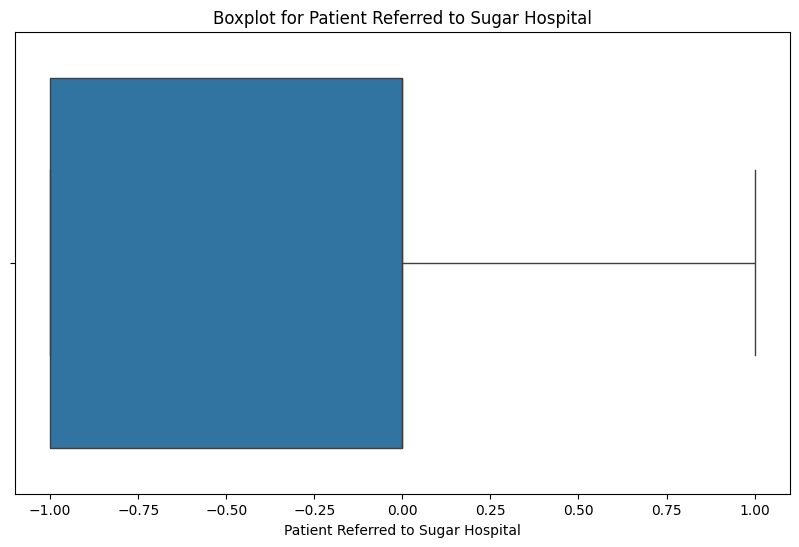

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Columns to visualize outliers
# numerical_columns = [
#     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
#     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
# ]

# Function to visualize outliers using a boxplot
def visualize_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[column])
            plt.title(f'Boxplot for {column}')
            plt.xlabel(column)
            plt.show()

# Visualize outliers
visualize_outliers(df, numerical_columns)


In [445]:
# Function to handle outliers using the IQR method
def handle_outliers(data, column, method='cap'):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if method == 'remove':
        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == 'cap':
        # Cap outliers to the nearest bound
        data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return data

# Specify the columns to handle outliers
# columns_to_handle = [
#     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
#     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
# ]

# Handle outliers in the specified columns
for column in numerical_columns:
    if column in df.columns:
        df = handle_outliers(df, column, method='cap')  # Change method to 'remove' if you prefer

# Display the updated dataset
print("Dataset after handling outliers:")
print(df.shape)


Dataset after handling outliers:
(4435, 36)


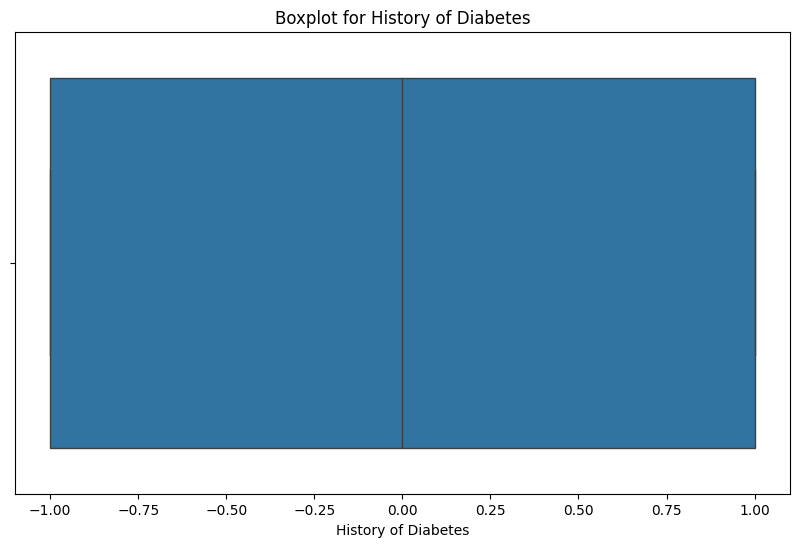

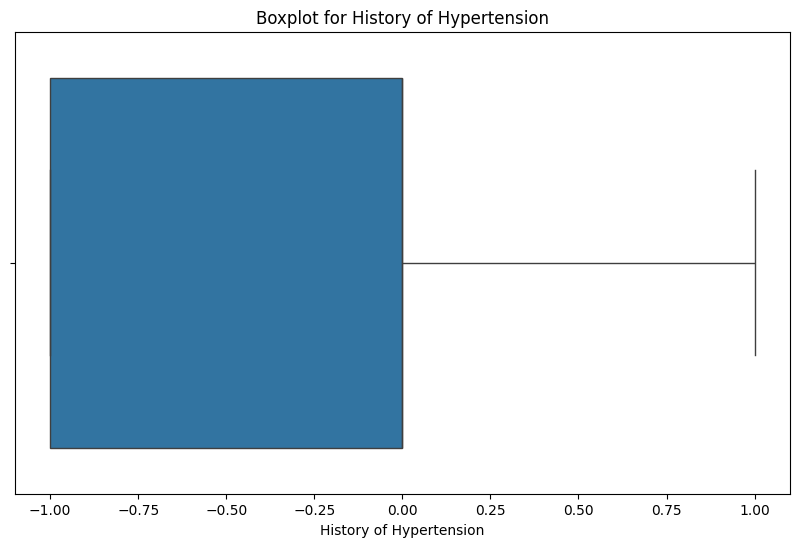

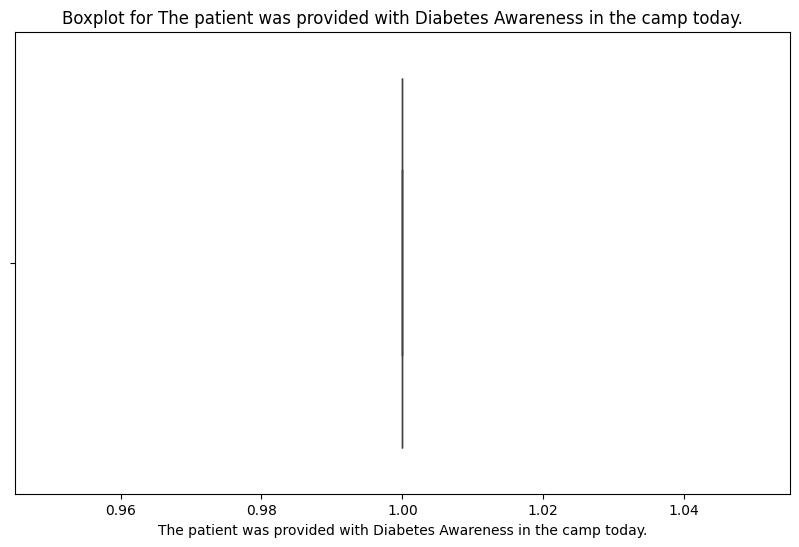

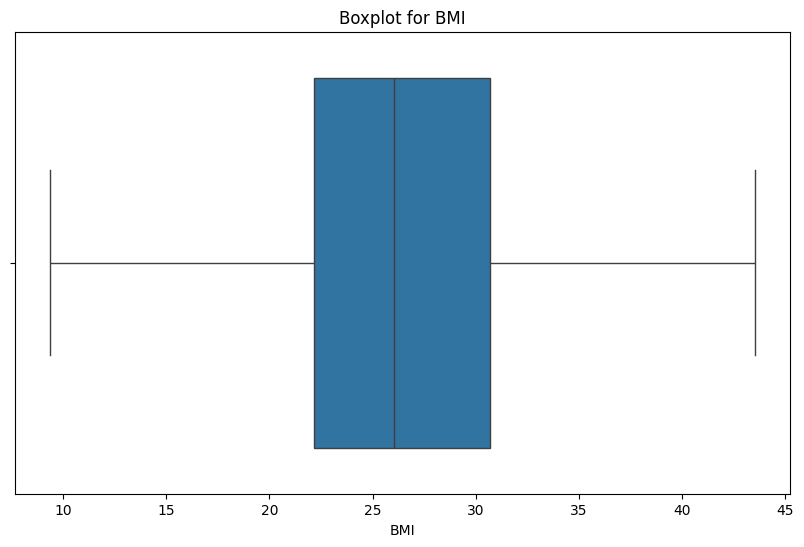

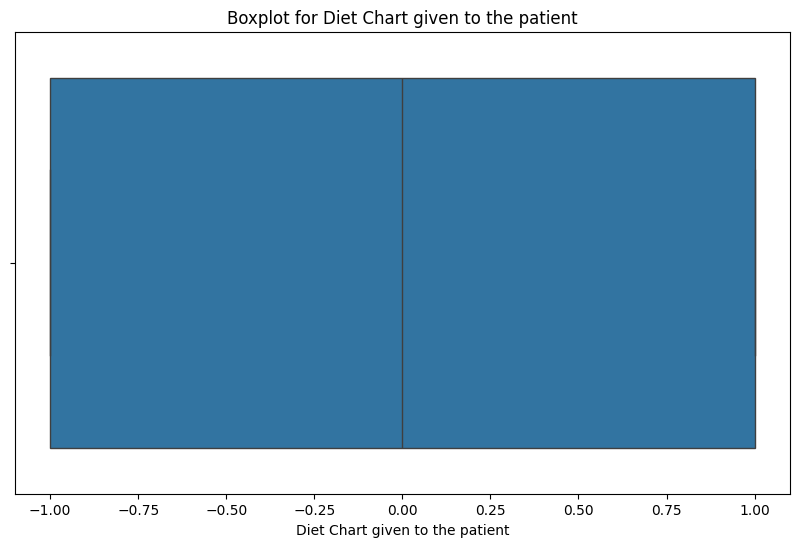

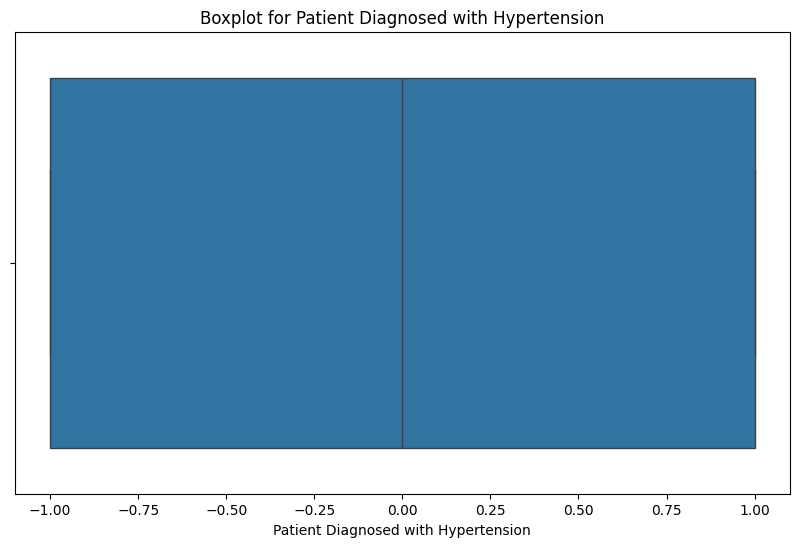

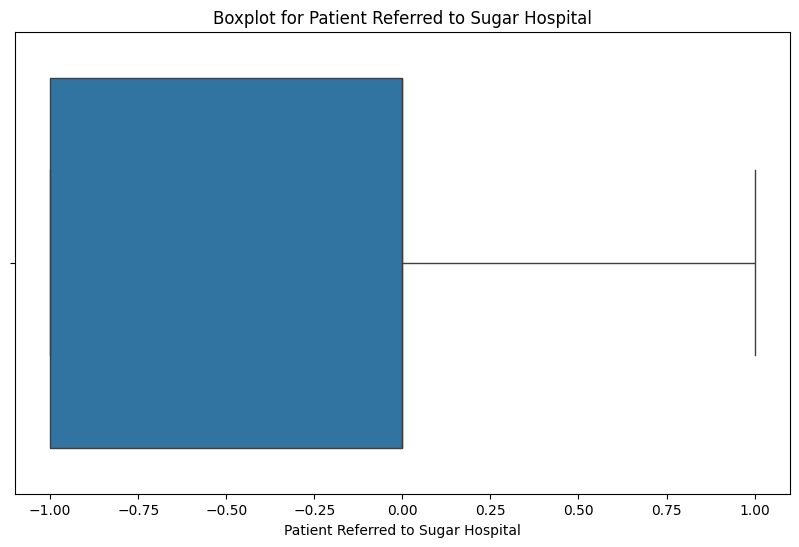

In [446]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Columns to visualize outliers
# numerical_columns = [
#     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
#     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
# ]

# Function to visualize outliers using a boxplot
def visualize_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[column])
            plt.title(f'Boxplot for {column}')
            plt.xlabel(column)
            plt.show()

# Visualize outliers
visualize_outliers(df, numerical_columns)


In [447]:
# Define thresholds for risk
bmi_threshold = 25  # Overweight
cholesterol_threshold = 240  # High cholesterol
hba1c_threshold = 6.5  # Diabetic threshold


# bmi_threshold = 30  # Overweight
# cholesterol_threshold = 300  # High cholesterol
# hba1c_threshold = 8  # Diabetic threshold


# Ensure numeric columns have correct data types
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce')
df['HBA1c'] = pd.to_numeric(df['HBA1c'], errors='coerce')

# Create a health risk target column
df['Health Risk'] = 0  # Default value is 0 (no risk)

# Update the column to 1 where the conditions are satisfied
df.loc[
    (df['History of Diabetes'] == 'Yes') |
    (df['History of Hypertension'] == 'Yes') |
    (df['BMI'] > bmi_threshold) |
    (df['Cholesterol'] > cholesterol_threshold) |
    (df['HBA1c'] >= hba1c_threshold),
    'Health Risk'
] = 1

# Display the DataFrame to verify
print(df[['Health Risk']].head())


   Health Risk
0            0
1            0
2            0
3            1
4            0


In [448]:
df.columns

Index(['Timestamp', 'Score', 'Camp Date', 'Area', 'Name', 'Gender',
       'National Id Card Number', 'Address', 'Contact Number ', 'Age',
       'History of Diabetes', 'History of Hypertension',
       'The patient was provided with Diabetes Awareness in the camp today.',
       'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height',
       'Weight', 'BMI', 'Cholesterol', 'HBA1c',
       'Diet Chart given to the patient', 'Patient diagnosis',
       'Patient Diagnosed with Hypertension',
       'Patient Referred to Sugar Hospital', 'Eye Screening Notes',
       'Foot Screening Notes', 'Dental Screening', 'Doctors Name',
       'Doctor's Notes', 'Medicines/Insulin Prescribed',
       'Prescribed  Medicine Names ', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Obesity', 'Age Group', 'Health Risk'],
      dtype='object')

In [449]:
# Feature selection
features = ['BMI', 'Age Group', 'History of Diabetes', 'History of Hypertension', 
            'Diet Chart given to the patient', 'Random Blood Sugar Reading', 'Patient Diagnosed with Hypertension','Patient Referred to Sugar Hospital', 'Eye Screening Notes' ,'Medicines/Insulin Prescribed']
df = df.dropna(subset=features)
X = pd.get_dummies(df[features], drop_first=True)
y = df['Health Risk']

In [450]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['History of Diabetes', 'History of Hypertension', 'The patient was provided with Diabetes Awareness in the camp today.', 'BMI', 'Cholesterol', 'HBA1c', 'Diet Chart given to the patient', 'Patient Diagnosed with Hypertension', 'Patient Referred to Sugar Hospital', 'Health Risk']
Categorical Columns: ['Score', 'Area', 'Name', 'Gender', 'National Id Card Number', 'Address', 'Contact Number ', 'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height', 'Weight', 'Patient diagnosis', 'Eye Screening Notes', 'Foot Screening Notes', 'Dental Screening', 'Doctors Name', "Doctor's Notes", 'Medicines/Insulin Prescribed', 'Prescribed  Medicine Names ', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Obesity', 'Age Group']


In [451]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [452]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
model = LogisticRegression(random_state=42, class_weight='balanced')

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9291

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.94      0.94      0.94        86

    accuracy                           0.93       141
   macro avg       0.93      0.93      0.93       141
weighted avg       0.93      0.93      0.93       141


Confusion Matrix:
[[50  5]
 [ 5 81]]


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [453]:
# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [454]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [455]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9574468085106383
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.96        86

    accuracy                           0.96       141
   macro avg       0.95      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141



In [456]:
df.columns

Index(['Timestamp', 'Score', 'Camp Date', 'Area', 'Name', 'Gender',
       'National Id Card Number', 'Address', 'Contact Number ', 'Age',
       'History of Diabetes', 'History of Hypertension',
       'The patient was provided with Diabetes Awareness in the camp today.',
       'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height',
       'Weight', 'BMI', 'Cholesterol', 'HBA1c',
       'Diet Chart given to the patient', 'Patient diagnosis',
       'Patient Diagnosed with Hypertension',
       'Patient Referred to Sugar Hospital', 'Eye Screening Notes',
       'Foot Screening Notes', 'Dental Screening', 'Doctors Name',
       'Doctor's Notes', 'Medicines/Insulin Prescribed',
       'Prescribed  Medicine Names ', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Obesity', 'Age Group', 'Health Risk'],
      dtype='object')

In [457]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
df[['BMI', 'Cholesterol', 'HBA1c']] = imputer.fit_transform(df[['BMI', 'Cholesterol', 'HBA1c']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['BMI', 'Cholesterol']])


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Total_Patients  Diabetes_Percentage  \
Cluster                                        
0                   680                  0.0   
1                    14                  0.0   
2                    11                  0.0   

                                       Gender_Distribution  \
Cluster                                                      
0        [67.3529411764706, 27.647058823529413, 2.79411...   
1                  [57.14285714285714, 42.857142857142854]   
2                   [63.63636363636363, 36.36363636363637]   

                                    Age_Group_Distribution  \
Cluster                                                      
0        [7.205882352941176, 6.764705882352941, 5.44117...   
1        [21.428571428571427, 7.142857142857142, 7.1428...   
2        [18.181818181818183, 18.181818181818183, 9.090...   

         Average_Health_Risk  
Cluster                       
0                   0.651471  
1                   0.571429  
2            

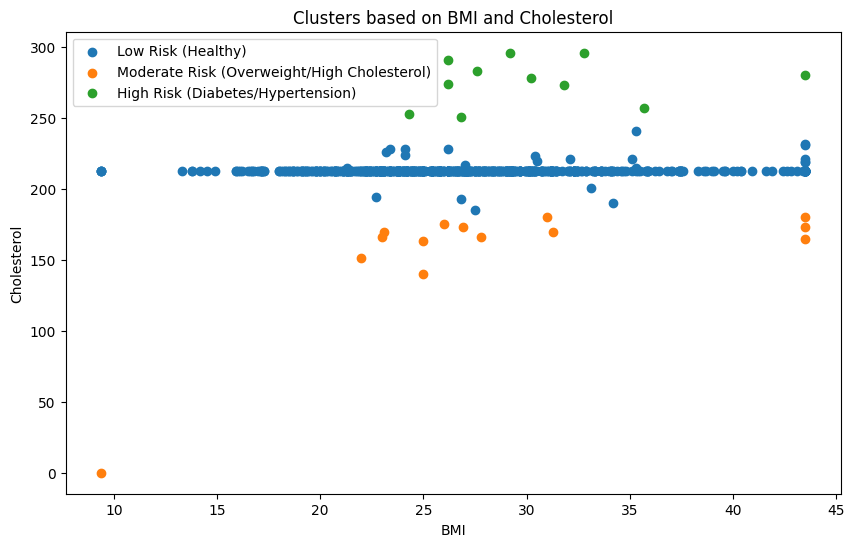

In [458]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(df[['BMI', 'Cholesterol']])

# Analyze clusters
cluster_summary = df.groupby('Cluster').agg(
    Total_Patients=('Cluster', 'count'),
    Diabetes_Percentage=('History of Diabetes', lambda x: (x == 'Yes').mean() * 100),
    Gender_Distribution=('Gender', lambda x: x.value_counts(normalize=True) * 100),
    Age_Group_Distribution=('Age Group', lambda x: x.value_counts(normalize=True) * 100),
    Average_Health_Risk=('Health Risk', 'mean')
)

# Display cluster summary
print(cluster_summary)

# Map clusters to meaningful names based on health risk
cluster_names = {
    0: 'Low Risk (Healthy)',
    1: 'Moderate Risk (Overweight/High Cholesterol)',
    2: 'High Risk (Diabetes/Hypertension)'
}

# Assign the health risk-based cluster names
df['Cluster_Name'] = df['Cluster'].map(lambda x: cluster_names[x] if cluster_summary.loc[x, 'Average_Health_Risk'] <= 0.33 else
                                       (cluster_names[x] if cluster_summary.loc[x, 'Average_Health_Risk'] <= 0.66 else
                                        cluster_names[x]))

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['BMI'], cluster_data['Cholesterol'], label=cluster_names[cluster])

plt.title("Clusters based on BMI and Cholesterol")
plt.xlabel("BMI")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()


In [459]:
import numpy as np

def recommend(patient_data, kmeans_model, cluster_names):
    """
    Recommends health advice based on patient data and cluster information.
    
    Parameters:
        patient_data (dict): A dictionary containing patient information (e.g., BMI, Cholesterol).
        kmeans_model (KMeans): Trained KMeans model.
        cluster_names (dict): Mapping of cluster indices to descriptive names.
        
    Returns:
        str: Recommendation message.
    """
    # Extract patient features
    bmi = patient_data['BMI']
    cholesterol = patient_data['Cholesterol']
    
    # Predict the cluster for the given patient
    cluster = kmeans_model.predict([[bmi, cholesterol]])[0]
    cluster_name = cluster_names[cluster]
    
    # Provide recommendations based on the cluster
    recommendations = {
        'Low Risk (Low BMI & Low Cholesterol)': "Maintain your healthy lifestyle. Regular check-ups are still recommended.",
        'Moderate Risk (Average BMI & Cholesterol)': "Consider improving your diet and exercise routine to reduce health risks.",
        'High Risk (High BMI & High Cholesterol)': "Consult a healthcare professional for personalized advice and consider immediate lifestyle changes."
    }
    
    # Return the appropriate recommendation
    return f"Cluster: {cluster_name}\nRecommendation: {recommendations[cluster_name]}"

# Example usage
patient_info = {'BMI': 30, 'Cholesterol': 250}  # Input patient data
recommendation = recommend(patient_info, kmeans, cluster_names)
print(recommendation)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


KeyError: 'High Risk (Diabetes/Hypertension)'